In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Global parameters

In [19]:
h  = 2
gamma = 1.0/30
beta = 1.0/10


### Equations

$\alpha$ will depend on the $k_i$ of the cell and the total number of plasmids: 

$$\alpha_i = \frac{\beta}{1+\left(\frac{\sum n_i}{k_i}\right)^h}$$

In [13]:
def alpha(n1,n2,ki):
    return beta/(1+((n1+n2)/ki)**h)

The differential equation for each plasmid is: 

$$\dot{n_i} = n_i(\alpha_i-\gamma)$$

There is a **positive** term corresponding to: 

$$\dot{n_{i+}} = n_i\alpha_i$$

And a **negative** term corresponding to: 

$$\dot{n_{i-}} = n_i\gamma$$


In [14]:
def nplus(n1,n2,ki):
    return n1*alpha(n1,n2,ki)
def nminus(n1,n2,ki):
    return n1*gamma

Additionally, we can find the steady state for when there is only one type of plasmid in the cell:

$$\dot{n_i} = 0 \Rightarrow \alpha_i(n_i) = \gamma$$

$$\frac{\beta}{\gamma} -1 = \left(\frac{n_i}{k_i}\right)^h$$

$$\boxed{n_{ss} = k_i \left(\frac{\beta}{\gamma} -1 \right)^{\frac{1}{h}}}$$

In [183]:
def nss(k):
    return k*(beta/gamma -1 )**(1/h)

### Simulation

Gillespie functions

In [136]:
def tau(s,r):
    return np.log(1/r)/s

def events(n1,n2,k1,k2):
    return [nplus(n1,n2,k1),nminus(n1,n2,k1),nplus(n2,n1,k2),nminus(n2,n1,k2)]

def action(n1_list,n2_list,events,r):
    normedEvents = np.array(events)/sum(events)
    normedEvents = np.cumsum(normedEvents)
    
    if(r<normedEvents[0]):
        n1_list.append(n1_list[-1]+1)
        n2_list.append(n2_list[-1])
        return
    if(r<normedEvents[1]):
        n1_list.append(n1_list[-1]-1)
        n2_list.append(n2_list[-1])
        return
    if(r<normedEvents[2]):
        n1_list.append(n1_list[-1])
        n2_list.append(n2_list[-1]+1)
        return
    else:
        n1_list.append(n1_list[-1])
        n2_list.append(n2_list[-1]-1)
    

### Single cell simulation

In [162]:
def sim1Cell(k1,k2):
    n1 = [1.0]
    n2 = [1.0]
    t = [0.0]

    totT = 240
    while(t[-1]<totT):
    #     print(t[-1])
#         print('\r' + "{:.2f}%".format(t[-1]*100/totT),end="")
    #     print(len(t),len(n1),len(n2))

        r1= np.random.random()

        eventsNow = events(n1[-1],n2[-1],k1,k2)

        t.append(t[-1]+tau(sum(eventsNow),r1))

        r2 = np.random.random()
        action(n1,n2,eventsNow,r2)
    return t,n1,n2
    

### Multiple cell simulation

In [171]:
def multiSim(k1,k2,N=400):
    n1s = []
    n2s = []
    ts= []


    for i in range(N):
        t,n1,n2=sim1Cell(k1,k2)
        n1s.append(n1)
        n2s.append(n2)
        ts.append(t)
    return ts,n1s,n2s

### Multiple cell simulation and plot 

In [185]:
def simAndPlot(ks):
    fig = plt.figure(figsize=(15,6*len(ks)))
    for w,kk in enumerate(ks):
        k1 = kk[0]
        k2 = kk[1]
        ts,n1s,n2s = multiSim(k1,k2)
        lastn1 = []
        lastn2=[]
        
        

        plt.subplot(len(ks),2,w*2+1)
        for i in range(len(ts)):
            lastn1.append(n1s[i][-1])
            lastn2.append(n2s[i][-1])
            plt.plot(ts[i],n1s[i],color='red'  ,alpha=0.2)
            plt.plot(ts[i],n2s[i],color='black',alpha=0.2)

        plt.plot(ts[0],n1s[0],color='red'  ,label = 'n1',alpha=0.2)
        plt.plot(ts[0],n2s[0],color='black',label = 'n2',alpha=0.2)
        plt.xlabel('time (mins)')
        plt.ylabel('# of plasmids')
        plt.legend()
        plt.title('k1 = {} k2 = {}'.format(k1,k2))

        plt.subplot(len(ks),2,w*2+2)

        nbins = np.linspace(0,90,30)
        plt.hist(lastn1,bins=nbins,alpha = 0.5,color = 'red'  ,label = 'n1',density=True)
        plt.hist(lastn2,bins=nbins,alpha = 0.5,color = 'black',label = 'n2',density=True)
        plt.plot([nss(k1),nss(k1)],[0,0.15],linestyle='--',color = 'red',label='n1 steady state')
        plt.plot([nss(k2),nss(k2)],[0,0.15],linestyle='--',color = 'black',label='n2 steady state')
        plt.xlabel("# of plasmids")
        plt.ylabel("frequency")
        plt.legend()
        plt.title('k1 = {} k2 = {}'.format(k1,k2))
        
        plt.savefig('primeraEtapa.png')
        

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


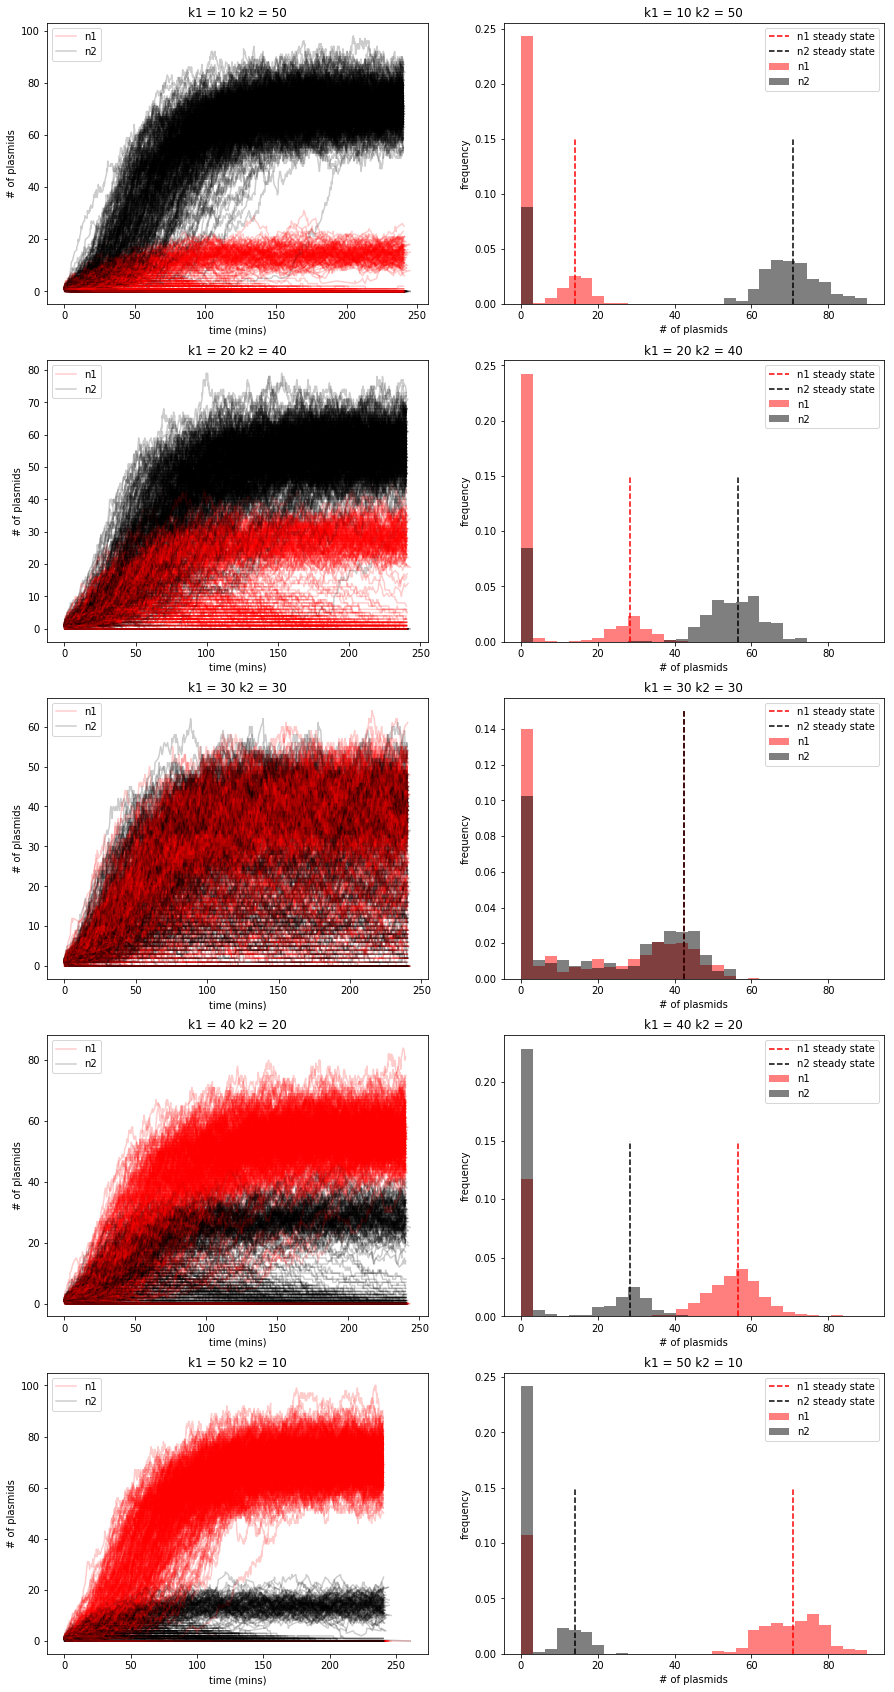

In [186]:
simAndPlot([[10,50],[20,40],[30,30],[40,20],[50,10]])